# Выполнить все задания на датасет populations.txt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

Plot the populations for the years in the period. Add legend and axis labels to the plot.

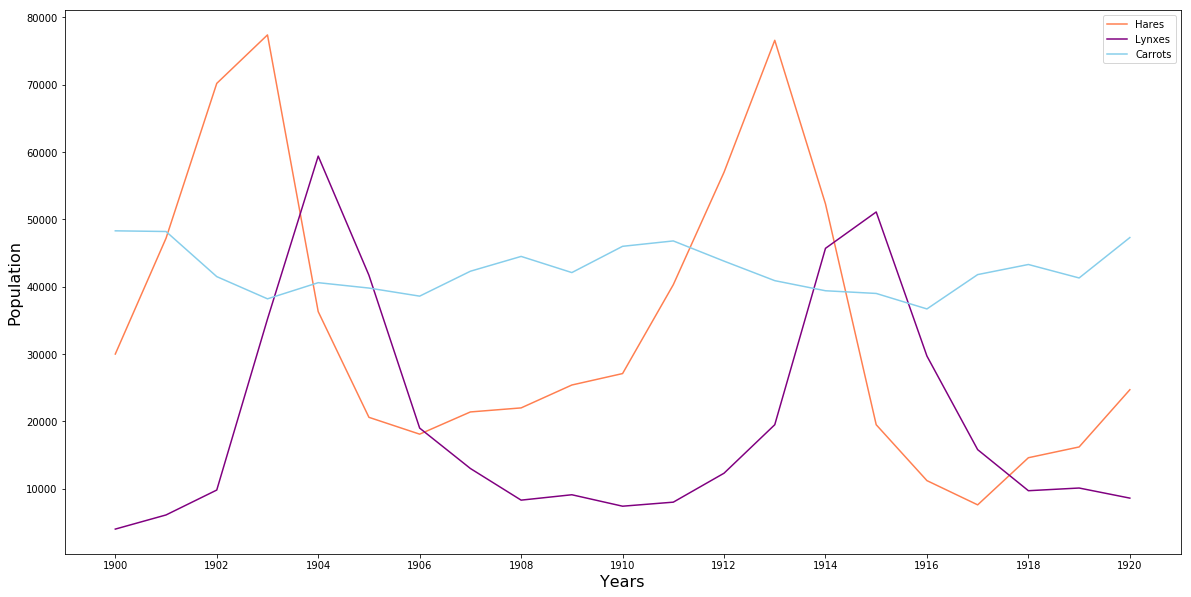

In [61]:
plt.figure(figsize=(20,10))

plt.plot(data[:,0], data[:,1], label='Hares', c='coral')
plt.plot(data[:,0], data[:,2], label='Lynxes', c='purple')
plt.plot(data[:,0], data[:,3], label='Carrots', c='skyblue')
plt.xticks(data[:,0].astype(int)[::2])
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population',  fontsize=16)
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

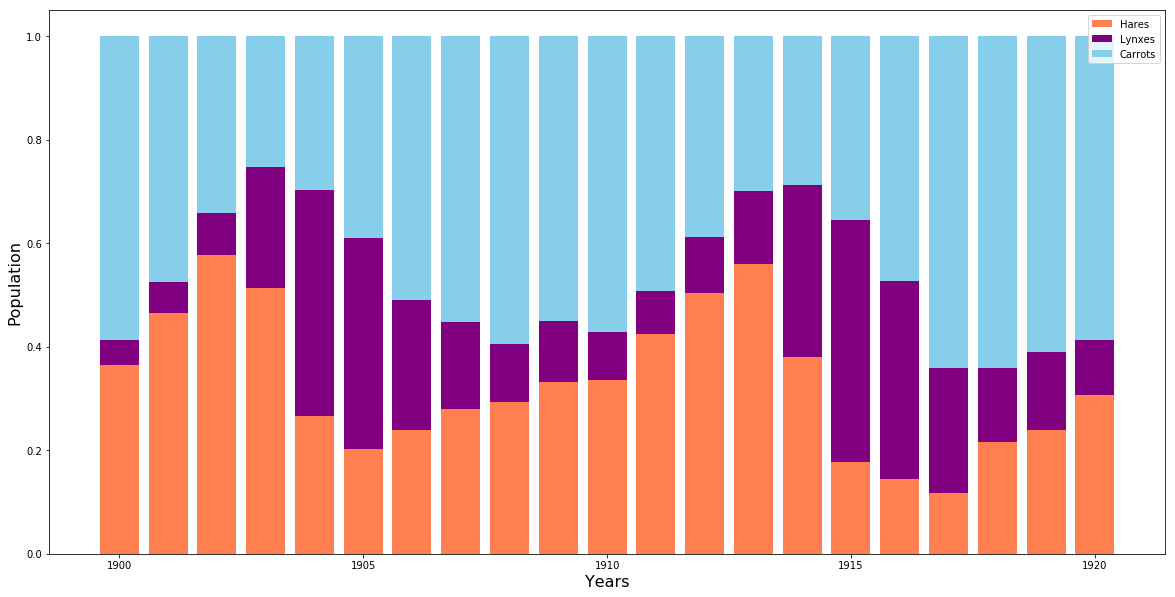

In [62]:
x = data[:,0].astype(int)
y = [data[i, 1]/(data[i, 1]+data[i, 2]+data[i,3]) for i in range(len(data[:,0]))]
z = [data[i, 2]/(data[i, 1]+data[i, 2]+data[i,3]) for i in range(len(data[:,0]))]
w = [data[i, 3]/(data[i, 1]+data[i, 2]+data[i,3]) for i in range(len(data[:,0]))]

plt.figure(figsize=(20,10))
plt.bar(x, y, label='Hares', color='coral')
plt.bar(x, z, label='Lynxes', color='purple', bottom=y)
plt.bar(x, w, label='Carrots', color='skyblue', bottom=([yi+zi for yi, zi in zip(y, z)]))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population',  fontsize=16)
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

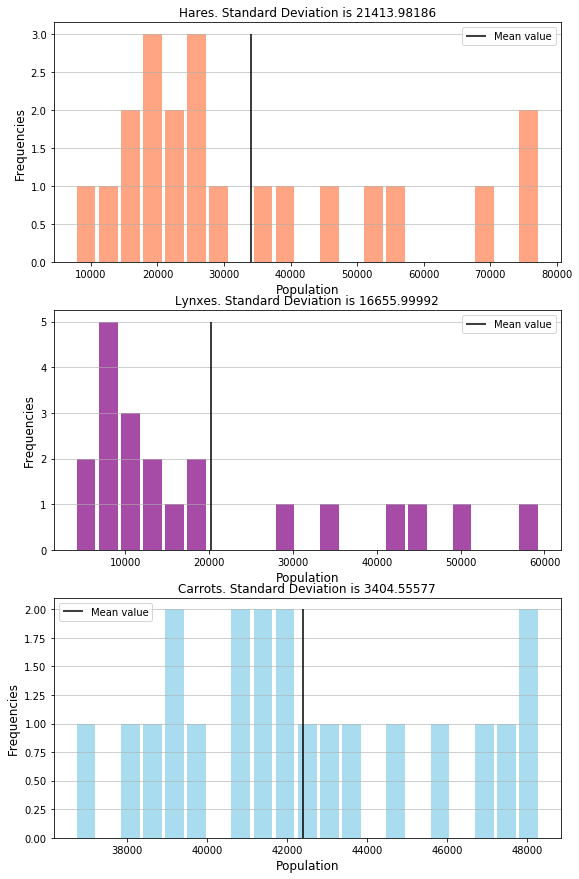

In [110]:
import statistics 
plt.figure(figsize=(20,15))

mean1=statistics.mean(data[:,1])
plt.subplot(3, 2, 1)
plt.hist(data[:,1], bins=len(data[:,0]), color='coral', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(mean1, 0, 3, label='Mean value')
plt.title('Hares. Standard Deviation is {0:3.5f}'.format(statistics.stdev(data[:,1])))
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequencies',  fontsize=12)
plt.legend()

mean2=statistics.mean(data[:,2])
plt.subplot(3,2, 3)
plt.hist(data[:,2], bins=len(data[:,0]), color='purple', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(mean2, 0, 5, label='Mean value')
plt.title('Lynxes. Standard Deviation is {0:3.5f}'.format(statistics.stdev(data[:,2])))
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequencies',  fontsize=12)
plt.legend()

mean3=statistics.mean(data[:,3])
plt.subplot(3,2, 5)
plt.hist(data[:,3], bins=len(data[:,0]), color='skyblue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.vlines(mean3, 0, 2, label='Mean value')
plt.title('Carrots. Standard Deviation is {0:3.5f}'.format(statistics.stdev(data[:,3])))
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequencies',  fontsize=12)
plt.legend()

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

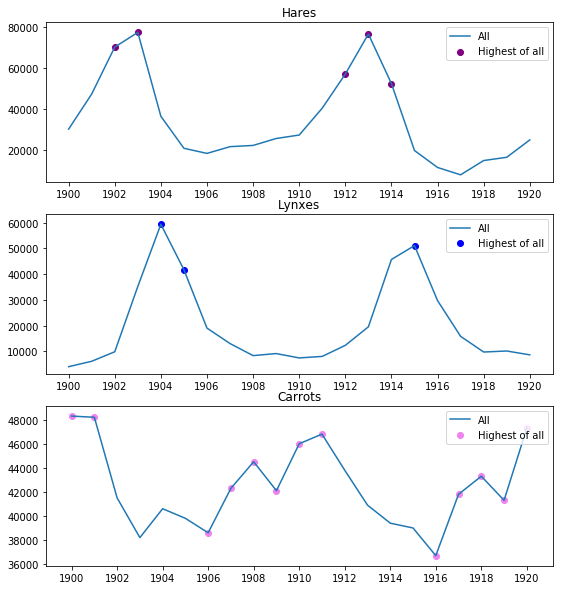

In [4]:
a = np.array([(np.argmax(data[i, 1:]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
a0 = a[1][a[0] == 0]
a1 = a[1][a[0] == 1]
a2= a[1][a[0] == 2]

plt.figure(figsize=(20,10))

plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[a0,0], data[a0,1], c='purple')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')

plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[a1,0], data[a1,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')

plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[a2,0], data[a2,3], c='violet')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')

plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


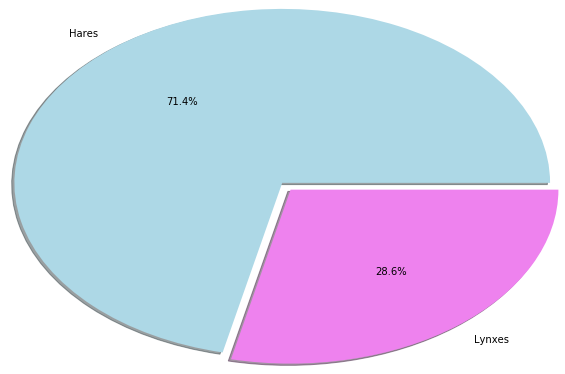

In [33]:
a = np.array([(np.argmax(data[i, 1:3]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
x = a[0] == 0
x1 = np.array([int(x[i]) * "H"+ (1 -int(x[i])) * "L" for i in range(len(x))])
a1 = [len(x1[x1 == 'H']) / len(a[0]), (len(x1[x1=='L']) )/len(a[0])] 
print(x1)

colors=('lightblue', 'violet')
explode=(0.05, 0.05)
plt.pie(a1, labels = ['Hares', 'Lynxes'], explode=explode, colors=colors, shadow=True, autopct='%1.1f%%', radius = 2 )
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

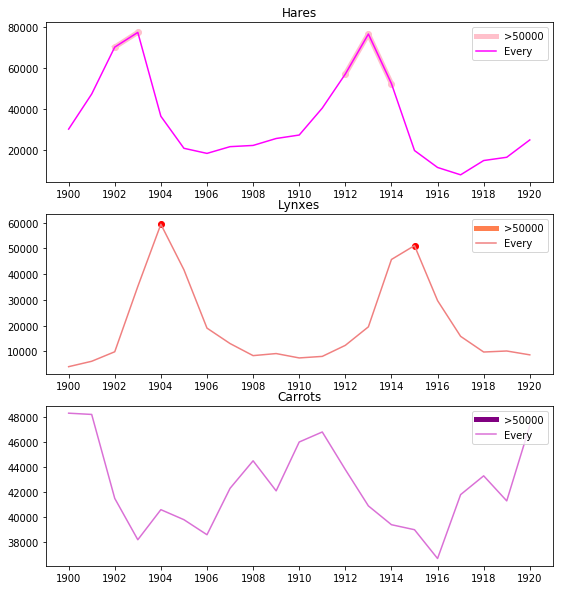

In [12]:
x = data[:,0]
y1 = np.ma.masked_where(data[:,1] < 50000, data[:,1])
y2 = data[:, 1]
z1 = np.ma.masked_where(data[:,2] < 50000, data[:,2])
z2 = data[:, 2]
w1 = np.ma.masked_where(data[:,3] < 50000, data[:,3])
w2 = data[:, 3]

plt.figure(figsize=(20,10))

plt.subplot(3, 2, 1)
lines = plt.plot(x, y1, x, y2)
plt.setp(lines[1], c='magenta')
plt.setp(lines[0], linewidth=5, c='pink')
plt.scatter(x, y1, c='pink')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])

plt.subplot(3, 2, 3)
lines = plt.plot(x, z1, x, z2)
plt.setp(lines[1], c='lightcoral')
plt.setp(lines[0], linewidth=5, c='coral')
plt.scatter(x, z1, c='r')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])

plt.subplot(3, 2, 5)
lines = plt.plot(x, w1, x, w2)
plt.setp(lines[0], linewidth=5, c='purple')
plt.setp(lines[1], c='orchid')
plt.scatter(x, w1, c='purple')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])

plt.show()

Find the top 2 years for each species when they had the lowest populations.

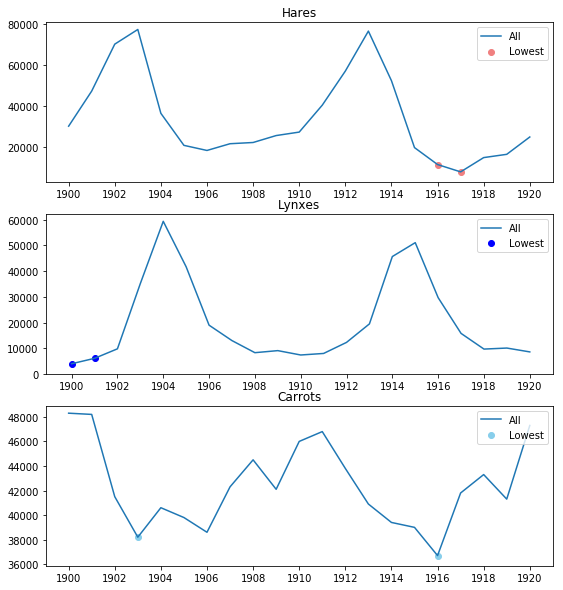

In [6]:
y1 = np.argsort(data[:, 1])[:2]
y2 = np.argsort(data[:, 2])[:2]
y3 = np.argsort(data[:, 3])[:2]

plt.figure(figsize=(20,10))

plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[y1,0], data[y1,1], c='lightcoral')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')

plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[y2,0], data[y2,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')

plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[y3,0], data[y3,3], c='skyblue')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')

plt.show()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

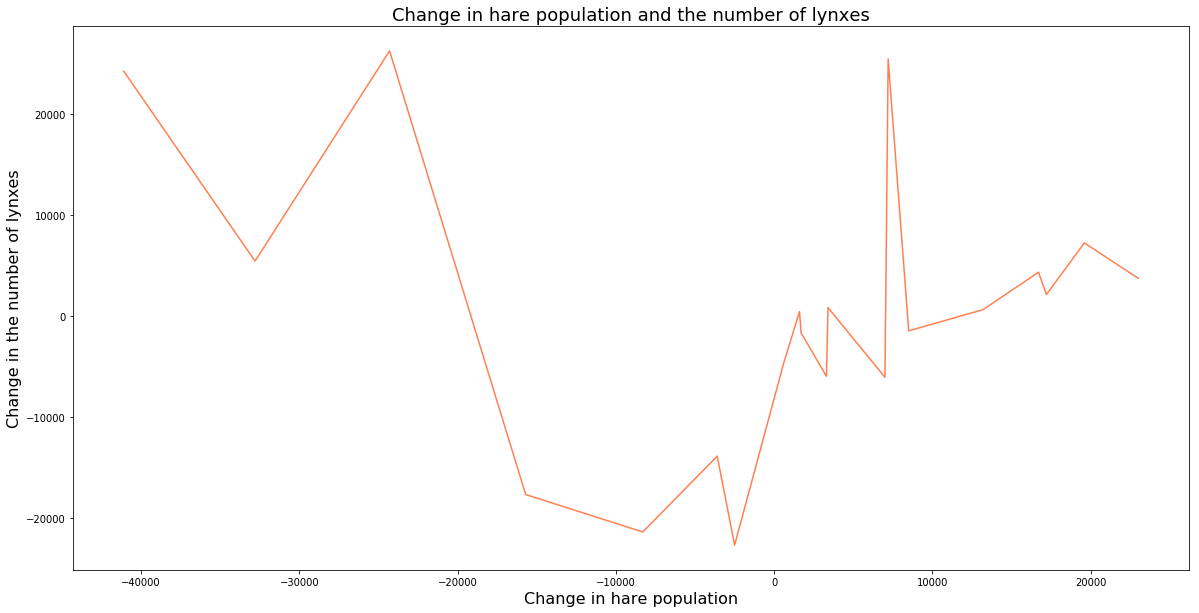

Коэффициент корреляции = -0.17801


In [73]:
from itertools import product

plt.figure(figsize=(20,10))

x=[(data[i+1,1]-data[i,1]) for i in range(len(data[:,0])-1)]
jj=np.argsort(x)
y=[(data[i+1,2]-data[i,2]) for i in range(len(data[:,0])-1)]
xx=[x[int(jj[i])] for i in range(len(data[:,0])-1)]
yy=[y[int(jj[i])] for i in range(len(data[:,0])-1)]

plt.plot(xx, yy, c='coral')
plt.xlabel('Change in hare population', fontsize=16)
plt.ylabel('Change in the number of lynxes',  fontsize=16)
plt.title('Change in hare population and the number of lynxes', fontsize=18)


plt.show()

corr= np.corrcoef(x, y)
print("Коэффициент корреляции = {0:3.5f}".format(corr[0,1]))

Show population of hares vs carrots and hares vs lynxes.

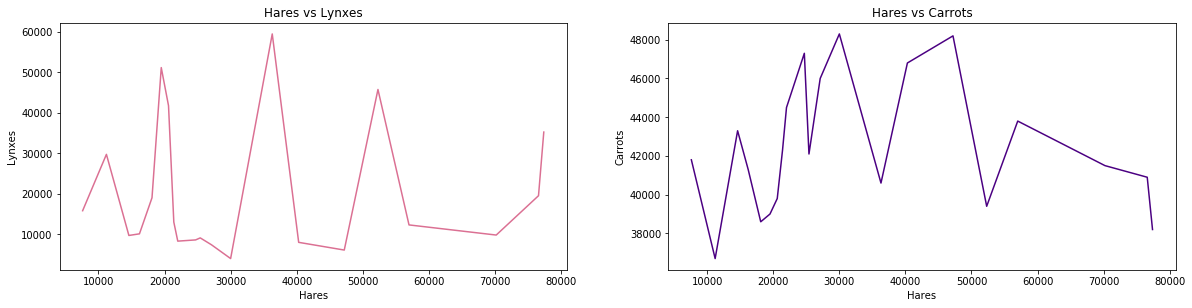

In [7]:
hares = np.argsort(data[:, 1])

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.plot(data[hares, 1], data[hares, 2], c='palevioletred')
plt.title('Hares vs Lynxes')
plt.xlabel('Hares')
plt.ylabel('Lynxes')

plt.subplot(2, 2, 2)
plt.plot(data[hares, 1], data[hares, 3], c= 'indigo')
plt.title('Hares vs Carrots')
plt.xlabel('Hares')
plt.ylabel('Carrots')

plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [3]:
median = np.median(data[:20, 1])
print("Прогнозируемое значение = {0}".format(median))
error = abs((median / data[20, 1]) - 1)
print("Ошибка = {0:3.5f}".format(error))


Прогнозируемое значение = 26250.0
Ошибка = 0.06275
